In [ ]:
# tweets=api.user_timeline(screen_name='RealDonaldTrump', count=20)
#print(tweets)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import re

In [2]:
ACCESS_TOKEN="1114257900657106945-1dCAiAhqC8Dn7N0SYchfrcPBJNnO3R"
ACCESS_TOKEN_SECRET="9q6svuksiWxwxYggI5hVWgY8ZLrXESSMUAnGYNkEp97By"
CONSUMER_SECRET="g4CkmDKmbv2jNxm2yQOmth8NWOthgCgDSZGP1vBRuP5v4g6ZhD"
CONSUMER_KEY="eOqXos4xUTFpuv0uxPYCvRIpH"

In [3]:
def twitter_setup():
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET) # Authorization to consumer key and consumer secret
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET) # Access to user's access key and access secret 
    api = tweepy.API(auth)  # Return API with authentication:
    return api

In [4]:
hashtag=input('Enter hashtag to search about:')

Enter hashtag to search about:#ABSCBNBall2019


Number of tweets extracted: 100.



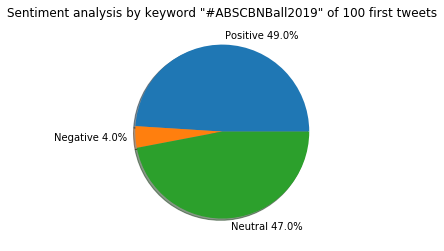

,Tweet,len,user_name,date,source,location,number of followers,retweets,Sentiment
0,Look smile Waaaahhhh breathe taraga MaharrrrFU...,140,hikariCassie,2019-09-14 11:57:30,Twitter for iPhone,,489,15,0.3
1,Kisses Delavin Magic,127,jazminead1109,2019-09-14 11:57:30,Twitter for Android,"National Capital Region, Repub",215,21,0.5
2,love stunning,97,callmejeydiey,2019-09-14 11:57:30,Twitter for iPhone,In the middle of the road 🍀,40,15,0.5
3,Artists will make your hearts beat faster,104,ilovemayward22,2019-09-14 11:57:30,Twitter Web App,,125,559,0.0
4,outfit inspired Manila Cathedral,112,AmySarad,2019-09-14 11:57:30,Twitter for Android,,2,1347,0.0


In [6]:
# Extracting tweets by a key word
extractor = twitter_setup()
tweets = extractor.search(q=hashtag, count=500, lang='en')

print("Number of tweets extracted: {}.\n".format(len(tweets)))

# Creating a DataFrame with extracted tweets
tweet_text=[]
for tweet in tweets[:]:
    text=TextBlob(tweet.text)
    tweet_text.append(tweet.text)
data_on_new_hashtag={'Tweet': tweet_text}
df=pd.DataFrame(data_on_new_hashtag)

# Tweets cleaning

clean_tweets=[]
for tweet in df.Tweet :
    tweet=re.sub(r'@[A-Za-z0-9]+','',tweet) # Remove @username
    tweet=re.sub('https?://[A-Za-z0-9./]+','', tweet) # Remove https links
    tweet = re.sub(r'\b\w{1,3}\b', '', tweet) # Remove small words
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')  # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = re.sub(r'\&\w*;', '', tweet) # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub('[!@$:]', '', tweet) # Remove some special characters
    tweet = tweet.lstrip(' ') # Removing the blank space at the beginning
    tweet = re.sub(r'#\w*', '', tweet) # Remove hashtags
    tweet=re.sub('[^A-Za-z0-9]+', ' ', tweet)
    clean_tweets.append(tweet)
    
# Sentiment analysis on cleaned tweets

neutral=0
positive=0
negative=0
polarity=[]

for tweet in clean_tweets:
    text=TextBlob(tweet)
    polarity.append(text.sentiment.polarity)

# Assigning all values to three categories: positive, negative and neutral sentiment

    if text.sentiment.polarity < 0:
        negative +=1 
        
         # The + operation adds the array elements to the original array.
    elif text.sentiment.polarity > 0:
        positive += 1
    else: neutral += 1
        
# Calculating the percentage of positive, negative and neutral sentiment

neutral_percent=round(neutral/len(polarity)*100,2)
positive_percent=round(positive/len(polarity)*100,2)
negative_percent=round(negative/len(polarity)*100,2)

# Plotting a pie chart
labels='Positive '+str(positive_percent)+'%', 'Negative '+str(negative_percent)+'%', 'Neutral '+str(neutral_percent)+'%'
sizes=[positive_percent, negative_percent, neutral_percent]
plt.title('Sentiment analysis by keyword "'+str(hashtag)+'" of '+str(len(polarity))+' first tweets')
plt.pie(sizes, labels=labels, shadow=True)

plt.show()

# Creating DataFrame (updating the previous one) with cleaned tweets and addtional interesting information on them 

df['Tweet']=clean_tweets
df['len']=np.array([len(tweet.text) for tweet in tweets])
df['user_name']= np.array([tweet.user._json['screen_name'] for tweet in tweets])
df['date']=np.array([tweet.created_at for tweet in tweets])
df['source']=np.array([tweet.source for tweet in tweets])
#df['likes']=np.array([tweet.favorite_count for tweet in tweets])
df['location']=np.array([tweet.user._json['location'] for tweet in tweets])
#df['user_id']=np.array([tweet.id for tweet in tweets])
df['number of followers']=np.array([tweet.user._json['followers_count'] for tweet in tweets])
df['retweets']=np.array([tweet.retweet_count for tweet in tweets])
df['Sentiment']=polarity

df.head()

In [7]:
df['calculated_field']=df.Sentiment*df['number of followers']*df.retweets

In [8]:
df.nlargest(10, 'calculated_field').sort_values(by='Sentiment', ascending=False)

,Tweet,len,user_name,date,source,location,number of followers,retweets,Sentiment,calculated_field
35,Artists LOOK Loisa Andalio Ronnie Alonte look...,140,DailyLoisa,2019-09-14 11:57:29,Twitter for Android,LoiYals,5608,39,0.700,153098.40
10,Artists Maymay Entrata looks perfect tonight ...,127,veveabaricia,2019-09-14 11:57:30,Twitter for Android,Jesus Christ,549,1230,0.600,405162.00
37,lovely looks perfect tonight modern Filipi an...,140,yuanxi_88,2019-09-14 11:57:29,Twitter for iPhone,Beijing Republic of China,135,2021,0.550,150059.25
95,retweet button excited tandem grace,140,ayejhndl,2019-09-14 11:57:27,Twitter for iPhone,,10304,1264,0.375,4884096.00
73,ladies Otso looking lovely their first appeara...,139,im_so_loooost_,2019-09-14 11:57:27,Twitter Web App,Philippines,224,793,0.375,66612.00
58,ready carpet Here sneak peek more photos,140,KenkenFanGirl,2019-09-14 11:57:28,Twitter for Android,Angat Bulacan,160,1422,0.350,79632.00
7,finally started love looks Kisses Alexa what ...,140,KIntl_Hans,2019-09-14 11:57:30,Twitter for iPhone,"Masbate City, Bicol Region",2375,223,0.250,132406.25
97,Gold indeed Maymay never disappoints Drop dead...,117,merlaa_deasiss,2019-09-14 11:57:27,Twitter for iPhone,Republic of the Philippines,2064,355,0.250,183180.00
23,tazaki Maymay attacking whole being today lik...,140,meinfinity23,2019-09-14 11:57:29,Twitter for Android,Philippine,9060,162,0.200,293544.00
14,Artists Maymay Entrata Edward Barber modern F...,140,TrynaMayMay,2019-09-14 11:57:30,Twitter for Android,BATANGAS,679,882,0.200,119775.60


In [11]:
df.nsmallest(10, 'calculated_field').sort_values(by='Sentiment', ascending=True)

,Tweet,len,user_name,date,source,location,number of followers,retweets,Sentiment,calculated_field
25,MAYMAY ENTRATA KILLING GAME HERE,83,gmarch31,2019-09-14 11:57:29,Twitter for Android,"National Capital Region, Repub",256,333,-0.400000,-34099.200000
67,GIRL MAYMAY DIDN HAVE SNAP THIS HARD,103,mhrjeanisvlntn,2019-09-14 11:57:27,Twitter for Android,peñaflorida,698,133,-0.291667,-27076.583333
43,looking extra ravishing sultry black gown ton...,140,julianajuliamae,2019-09-14 11:57:28,Twitter for Android,Republic of the Philippines,114,15,-0.083333,-142.500000
87,looking extra ravishing sultry black gown ton...,140,braant432,2019-09-14 11:57:27,Twitter for iPhone,israel,52,15,-0.083333,-65.000000
3,Artists will make your hearts beat faster,104,ilovemayward22,2019-09-14 11:57:30,Twitter Web App,,125,559,0.000000,0.000000
4,outfit inspired Manila Cathedral,112,AmySarad,2019-09-14 11:57:30,Twitter for Android,,2,1347,0.000000,0.000000
8,MayWard looking regal carpet Slay,101,mhaye0216,2019-09-14 11:57:30,Twitter for iPhone,"Makati City, National Capital Region",1,8,0.000000,0.000000
11,Showbiz LOOK Maymay Entrata Edward Barber loo...,140,Cyshyy,2019-09-14 11:57:30,Twitter for Android,Republic of the Philippines,79,336,0.000000,0.000000
12,Couple Sarah Lahbati Richard Gutierrez Ball 2019,140,sujufaulks,2019-09-14 11:57:30,Twitter for Android,,883,4,0.000000,0.000000
13,LOOK Maymay Entrata slays carpet walk,140,anne_jodelle,2019-09-14 11:57:30,Twitter for Android,Philippines,162,222,0.000000,0.000000


In [12]:
#Total sum of calculated_field values - shows if the trend is positive or negative
round(df.calculated_field.sum(),2)

6822820.14

In [13]:
import nltk
import itertools
from collections import Counter

In [14]:
#Tokenization (splitting text into a list of words) 
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
 
tokenized_tweets=[]
for tweet in clean_tweets:
    tokenized_tweets.append(tweet_tokenizer.tokenize(tweet))
    
merged = list(itertools.chain.from_iterable(tokenized_tweets))
top_most_common_words=Counter(merged).most_common(10)
top_most_common_words
#df3=pd.DataFrame(top_most_common_words, columns= ['Total','freq' ])


[('maymay', 35),
 ('edward', 20),
 ('look', 19),
 ('carpet', 19),
 ('entrata', 18),
 ('looking', 13),
 ('here', 9),
 ('love', 8),
 ('this', 8),
 ('couple', 8)]

In [15]:
# potivite tweets and negative tweets
p=df.Tweet.where(df.Sentiment > 0)
p.dropna(inplace=True)
n=df.Tweet.where(df.Sentiment < 0)
n.dropna(inplace=True)

In [16]:
#tokenization of positive and negative tweets
tokenized_tweets_p=[]
for tweet in list(p):
    tokenized_tweets_p.append(tweet_tokenizer.tokenize(tweet))
top_10_positive_words=Counter(list(itertools.chain.from_iterable(tokenized_tweets_p))).most_common(15)

tokenized_tweets_n=[]
for tweet in list(n):
    tokenized_tweets_n.append(tweet_tokenizer.tokenize(tweet))
top_10_negative_words=Counter(list(itertools.chain.from_iterable(tokenized_tweets_n))).most_common(15)


In [17]:
df1=pd.DataFrame(top_10_positive_words, columns= ['Positive','freq_p' ])
df2=pd.DataFrame(top_10_negative_words, columns= ['Negative','freq_n' ])
df_merged = df1.merge(df2, how='outer', left_index=True, right_index=True)
df_merged

,Positive,freq_p,Negative,freq_n
0,maymay,15,maymay,2
1,look,11,looking,2
2,edward,9,extra,2
3,love,8,ravishing,2
4,looking,8,sultry,2
5,this,7,black,2
6,couple,7,gown,2
7,looks,7,tonight,2
8,modern,7,entrata,1
9,gorgeous,7,killing,1


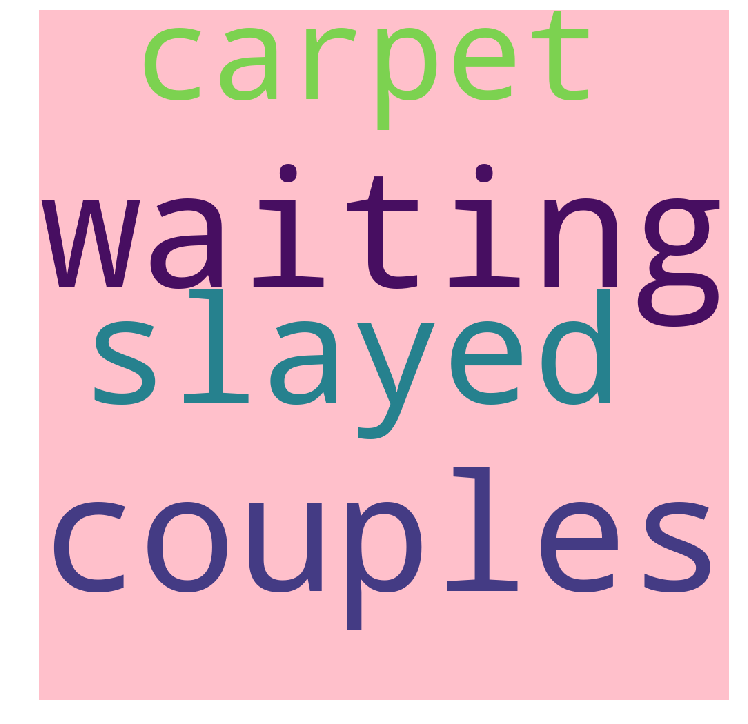

In [18]:
comment_words = ' ' #We will be appending the words to this var
stopwords = set(STOPWORDS) #Finds all stop words in the set of tweets.
for val in df.Tweet:
   val = str(val) #convert all tweet content into strings
   tokens = val.split() #Split all strings into individual components
   for i in range(len(tokens)):
      tokens[i] = tokens[i].lower() #Converts all the individual strings to lower case.
for words in tokens:
   comment_words = comment_words + words + ' '
wordcloud=WordCloud(width=1000,height=1000, background_color='pink', stopwords=stopwords,min_font_size=6).generate(comment_words)
#All of this is a single line
plt.style.use('ggplot')
plt.figure(figsize=(10,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [164]:
df.date.max()-df.date.min()

Timedelta('0 days 00:01:21')